In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Data/cardio_train.csv")

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


The Dataset contains several fields which leads to the __Presence or absence of cardiovascular disease__ within a patient.

1. __Age__ | Objective Feature | __age__ | int (days) |
2. __Height__ | Objective Feature | __height__ | int (cm) |
3. __Weight__ | Objective Feature | __weight__ | float (kg) |
4. __Gender__ | Objective Feature | __gender__ | categorical code |
5. __Systolic blood pressure__ | Examination Feature | __ap_hi__ | int |
6. __Diastolic blood pressure__ | Examination Feature | __ap_lo__ | int |
7. __Cholesterol__ | Examination Feature | __cholesterol__ | 1: normal, 2: above normal, 3: well above normal |
8. __Glucose__ | Examination Feature | __gluc__ | 1: normal, 2: above normal, 3: well above normal |
9. __Smoking__ | Subjective Feature | __smoke__ | binary |
10. __Alcohol intake__ | Subjective Feature | __alco__ | binary |
11. __Physical activity__ | Subjective Feature | __active__ | binary |
12. __Presence or absence of cardiovascular disease__ | Target Variable | __cardio__ | binary |

## Exploratory Data Analysis (EDA)

In [4]:
# checking for null values
df.isnull().any()

id             False
age            False
gender         False
height         False
weight         False
ap_hi          False
ap_lo          False
cholesterol    False
gluc           False
smoke          False
alco           False
active         False
cardio         False
dtype: bool

In [5]:
# Checking the datatypes
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [6]:
#changing the datatype of weight column
df['weight'] = df['weight'].astype(int)

In [7]:
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69,130,80,2,2,0,0,1,0
1,989,14648,1,163,71,110,70,1,1,0,0,1,1
2,990,21901,1,165,70,120,80,1,1,0,0,1,0
3,991,14549,2,165,85,120,80,1,1,1,1,1,0
4,992,23393,1,155,62,120,80,1,1,0,0,1,0
5,995,21143,1,164,61,100,70,1,1,0,0,1,0
6,996,18085,1,162,72,100,70,1,1,0,0,1,0
7,997,22547,1,161,93,140,90,2,1,0,0,1,1
8,999,21250,1,157,68,110,80,1,1,0,0,1,0
9,1000,22446,1,158,65,140,90,3,1,0,0,1,1


In [8]:
# Converting days into years in 'age' parameter
df['age'] = df['age']/365
df['age'] = df['age'].astype(int)
df.head(15)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0
5,995,57,1,164,61,100,70,1,1,0,0,1,0
6,996,49,1,162,72,100,70,1,1,0,0,1,0
7,997,61,1,161,93,140,90,2,1,0,0,1,1
8,999,58,1,157,68,110,80,1,1,0,0,1,0
9,1000,61,1,158,65,140,90,3,1,0,0,1,1


In [9]:
df.dtypes

id             int64
age            int64
gender         int64
height         int64
weight         int64
ap_hi          int64
ap_lo          int64
cholesterol    int64
gluc           int64
smoke          int64
alco           int64
active         int64
cardio         int64
dtype: object

In [10]:
df['gender'].value_counts().to_frame()

,gender
1,45079
2,24222


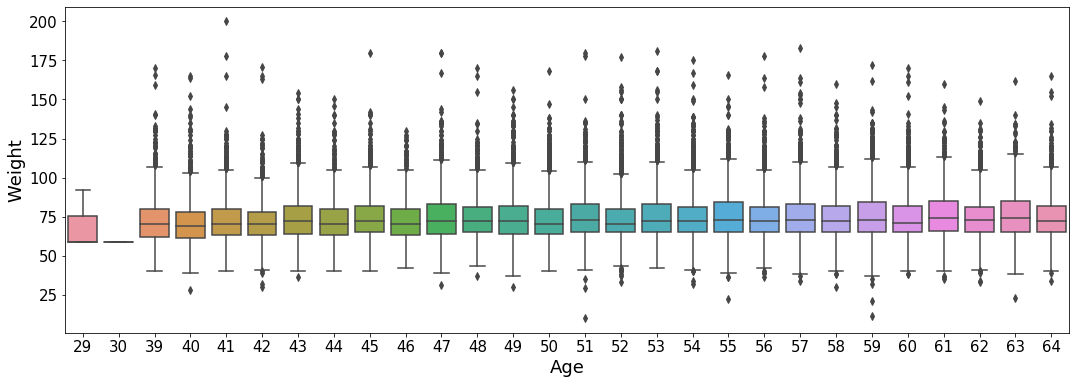

In [11]:
#box plot 
plt.figure(figsize=(18, 6))
sns.boxplot(x='age', y='weight', data=df)
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel("Age", size=18)
plt.ylabel("Weight", size=18)
plt.show()

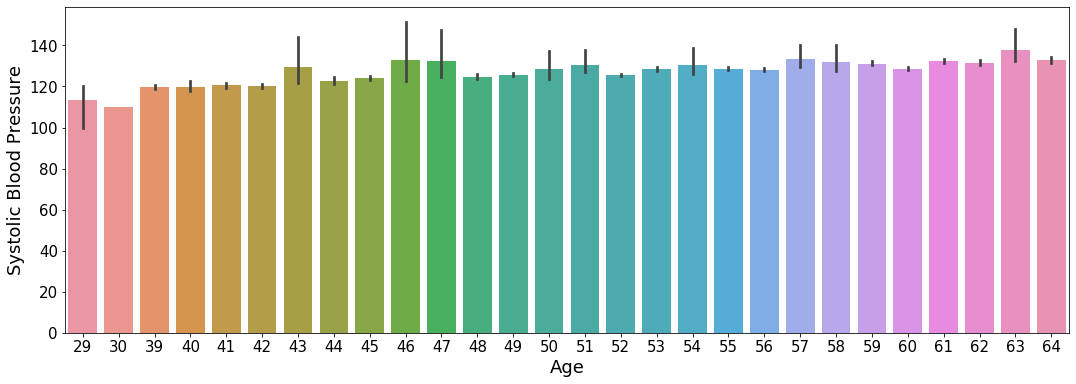

In [12]:
plt.figure(figsize=(18, 6))
sns.barplot(x= 'age', y= 'ap_hi', data= df)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Age', size= 18)
plt.ylabel('Systolic Blood Pressure', size= 18)
plt.show()

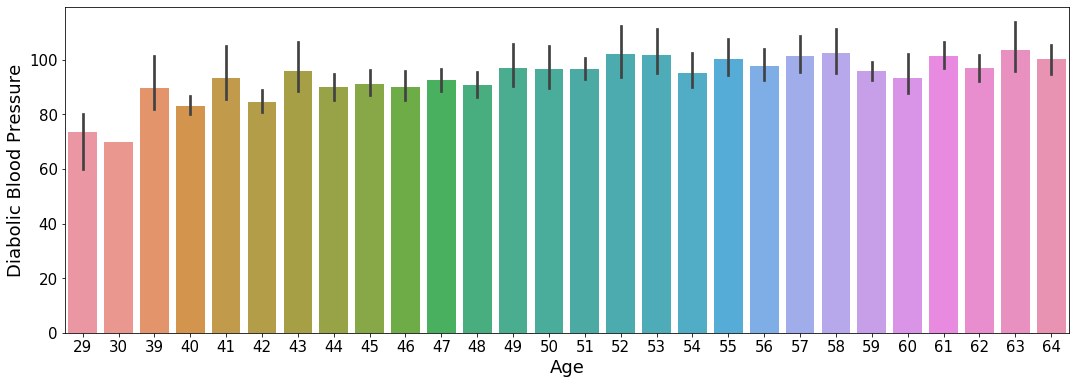

In [13]:
plt.figure(figsize=(18, 6))
sns.barplot(x= 'age', y= 'ap_lo', data= df)
plt.xticks(size= 15)
plt.yticks(size= 15)
plt.xlabel('Age', size= 18)
plt.ylabel('Diabolic Blood Pressure', size= 18)
plt.show()

### Feature Selection

In [14]:
X = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].values
X[:5]

array([[ 61,   1, 155,  69, 130,  80,   2,   2,   0,   0,   1],
       [ 40,   1, 163,  71, 110,  70,   1,   1,   0,   0,   1],
       [ 60,   1, 165,  70, 120,  80,   1,   1,   0,   0,   1],
       [ 39,   2, 165,  85, 120,  80,   1,   1,   1,   1,   1],
       [ 64,   1, 155,  62, 120,  80,   1,   1,   0,   0,   1]])

In [15]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61,1,155,69,130,80,2,2,0,0,1,0
1,989,40,1,163,71,110,70,1,1,0,0,1,1
2,990,60,1,165,70,120,80,1,1,0,0,1,0
3,991,39,2,165,85,120,80,1,1,1,1,1,0
4,992,64,1,155,62,120,80,1,1,0,0,1,0


In [16]:
y = df[['cardio']].values
y[:5]

array([[0],
       [1],
       [0],
       [0],
       [0]])

### Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [18]:
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= i)
    lr = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train, y_train)
    lr.fit(X_train, y_train)
    
    train_score = lr.score(X_train, y_train)
    test_score = lr.score(X_test, y_test)
    print("Test: {} and Train: {} and Random state= {}".format(train_score, test_score, i))

/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7084367484367484 and Train: 0.7053561122013159 and Random state= 0


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7085329485329486 and Train: 0.7084728154219093 and Random state= 1


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7077825877825877 and Train: 0.7032205933279464 and Random state= 2


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7125541125541126 and Train: 0.711878102274039 and Random state= 3


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7077056277056277 and Train: 0.7074339143483782 and Random state= 4


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7083020683020683 and Train: 0.705990996190696 and Random state= 5


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7065319865319866 and Train: 0.7077802147062219 and Random state= 6


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7134968734968735 and Train: 0.7075493478009928 and Random state= 7


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.711996151996152 and Train: 0.7158028396629343 and Random state= 8


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.712919672919673 and Train: 0.7087613990534457 and Random state= 9


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7081096681096681 and Train: 0.7091076994112894 and Random state= 10


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7121693121693121 and Train: 0.7132633037054138 and Random state= 11


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7146320346320346 and Train: 0.7171880410943091 and Random state= 12


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7082443482443482 and Train: 0.7021816922544153 and Random state= 13


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7116113516113516 and Train: 0.7002770402862749 and Random state= 14


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7133621933621933 and Train: 0.7098003001269768 and Random state= 15


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7065704665704665 and Train: 0.7128015698949556 and Random state= 16


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.714035594035594 and Train: 0.7179960752626111 and Random state= 17


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7115151515151515 and Train: 0.7132055869791065 and Random state= 18


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7113612313612314 and Train: 0.7131478702527992 and Random state= 19


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7141125541125541 and Train: 0.7061641463696179 and Random state= 20


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7078980278980279 and Train: 0.7068567470853053 and Random state= 21


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7118999518999519 and Train: 0.7118203855477317 and Random state= 22


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7132082732082732 and Train: 0.7077802147062219 and Random state= 23


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7072823472823473 and Train: 0.7067413136326908 and Random state= 24


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7104184704184704 and Train: 0.7046635114856286 and Random state= 25


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7074170274170274 and Train: 0.7076070645273 and Random state= 26


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7114959114959115 and Train: 0.7109546346531225 and Random state= 27


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7095911495911496 and Train: 0.7093962830428258 and Random state= 28


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test: 0.7095526695526696 and Train: 0.7084728154219093 and Random state= 29


### Artificial Neural Network

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [20]:
# Initialize ANN
ann_classifier = Sequential()

# Add input and first hidden layer
ann_classifier.add(Dense(activation= 'relu', input_dim= 11, units= 7, kernel_initializer= 'uniform'))

# Add input and second hidden layer
ann_classifier.add(Dense(activation= 'relu', units= 7, kernel_initializer= 'uniform'))

# Output layer
ann_classifier.add(Dense(activation= 'sigmoid', units= 2, kernel_initializer= 'uniform'))

# Compile ANN
ann_classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])
ann_classifier.add(Dense(activation= 'relu', units= 7, kernel_initializer= 'uniform'))
ann_classifier.add(Dense(activation= 'sigmoid', units= 1, kernel_initializer= 'uniform'))
ann_classifier.compile(optimizer= 'adam', loss= 'binary_crossentropy', metrics= ['accuracy'])

ann_classifier.fit(np.array(X_train), np.array(y_train), batch_size= 10, epochs= 150)

Epoch 1/150
51975/51975 [==============================] - 8s 156us/step - loss: 0.6237 - accuracy: 0.6648
Epoch 2/150
51975/51975 [==============================] - 9s 169us/step - loss: 0.5839 - accuracy: 0.7070
Epoch 3/150
51975/51975 [==============================] - 9s 181us/step - loss: 0.5778 - accuracy: 0.7102
Epoch 4/150
51975/51975 [==============================] - 7s 142us/step - loss: 0.5734 - accuracy: 0.7115
Epoch 5/150
51975/51975 [==============================] - 9s 171us/step - loss: 0.5683 - accuracy: 0.7151
Epoch 6/150
51975/51975 [==============================] - 8s 154us/step - loss: 0.5665 - accuracy: 0.7157
Epoch 7/150
51975/51975 [==============================] - 8s 152us/step - loss: 0.5644 - accuracy: 0.7181
Epoch 8/150
51975/51975 [==============================] - 8s 149us/step - loss: 0.5624 - accuracy: 0.7182
Epoch 9/150
51975/51975 [==============================] - 8s 148us/step - loss: 0.5621 - accuracy: 0.7188
Epoch 10/150
51975/51975 [===========

51975/51975 [==============================] - 8s 161us/step - loss: 0.5521 - accuracy: 0.7270
Epoch 77/150
51975/51975 [==============================] - 9s 166us/step - loss: 0.5525 - accuracy: 0.7282
Epoch 78/150
51975/51975 [==============================] - 8s 160us/step - loss: 0.5525 - accuracy: 0.7276
Epoch 79/150
51975/51975 [==============================] - 8s 154us/step - loss: 0.5526 - accuracy: 0.7266
Epoch 80/150
51975/51975 [==============================] - 8s 156us/step - loss: 0.5521 - accuracy: 0.7275
Epoch 81/150
51975/51975 [==============================] - 8s 155us/step - loss: 0.5520 - accuracy: 0.7283
Epoch 82/150
51975/51975 [==============================] - 8s 159us/step - loss: 0.5518 - accuracy: 0.7272
Epoch 83/150
51975/51975 [==============================] - 9s 168us/step - loss: 0.5523 - accuracy: 0.7278
Epoch 84/150
51975/51975 [==============================] - 9s 174us/step - loss: 0.5520 - accuracy: 0.7268
Epoch 85/150
51975/51975 [===============

### Naive Bayes Classifier

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    
    train_score = gnb.score(X_train, y_train)
    test_score = gnb.score(X_test, y_test)
    
    print("Test: {}, Train: {} and Random state: {}".format(train_score, test_score, i))

Test: 0.5897065897065897, Train: 0.5858247720189311 and Random state: 0


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.59001443001443, Train: 0.591711878102274 and Random state: 1
Test: 0.6045598845598845, Train: 0.6022163222901997 and Random state: 2
Test: 0.5834920634920635, Train: 0.5828812189772596 and Random state: 3
Test: 0.5900913900913901, Train: 0.5861710723767748 and Random state: 4


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.588936988936989, Train: 0.589056908692139 and Random state: 5
Test: 0.6003463203463203, Train: 0.6024471891954288 and Random state: 6
Test: 0.5922077922077922, Train: 0.5769941128939167 and Random state: 7
Test: 0.589013949013949, Train: 0.586632806187233 and Random state: 8


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.5901875901875901, Train: 0.5891146254184463 and Random state: 9
Test: 0.6133525733525733, Train: 0.6111624148678287 and Random state: 10
Test: 0.5835305435305436, Train: 0.5870945399976913 and Random state: 11
Test: 0.5878018278018278, Train: 0.5941936973334873 and Random state: 12


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.5931697931697931, Train: 0.5918850282811959 and Random state: 13
Test: 0.5912073112073112, Train: 0.5909615606602794 and Random state: 14
Test: 0.5877825877825877, Train: 0.5899803763130556 and Random state: 15
Test: 0.5856277056277056, Train: 0.5940205471545654 and Random state: 16


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.586012506012506, Train: 0.5878448574396861 and Random state: 17
Test: 0.5894949494949495, Train: 0.584381853861249 and Random state: 18
Test: 0.5911688311688311, Train: 0.5897495094078263 and Random state: 19
Test: 0.5895526695526696, Train: 0.583169802608796 and Random state: 20


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.5978643578643579, Train: 0.597194967101466 and Random state: 21
Test: 0.5833573833573834, Train: 0.581553734272192 and Random state: 22
Test: 0.5912842712842713, Train: 0.5798799492092809 and Random state: 23
Test: 0.5943819143819143, Train: 0.5856516218400092 and Random state: 24


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

Test: 0.6034247234247234, Train: 0.5993882027011428 and Random state: 25
Test: 0.5918422318422318, Train: 0.5902112432182847 and Random state: 26
Test: 0.5873785473785473, Train: 0.5885374581553734 and Random state: 27
Test: 0.591014911014911, Train: 0.5892877755973681 and Random state: 28
Test: 0.5998268398268398, Train: 0.5996190696063719 and Random state: 29


/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/devvrat/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Support Vector Machine

In [ ]:
from sklearn.svm import SVC

In [ ]:
for i in range(0, 30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= i)
    svm = SVC(kernel= 'linear', random_state= i)
    svm.fit(X_train, y_train)
    
    train_score = svm.score(X_train, y_train)
    test_score = svm.score(X_test, y_test)
    
    print("Test: {}, Train: {} and Random state: {}".format(train_score, test_score, i))